# Lending Club Case Study

<p> The Objective of this project is to identify the variables which will help us to identidy the defaulters more accurately. </p>
<p> 'Lending Club' company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.</p>
<hr/>

#### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

<br/> 

## Data Understanding
<hr/>

In [2]:
# Reading data from loan.csv file saved in the sub-folder 'Datasets'
loan_data = pd.read_csv('Datasets/loan.csv')

C:\Users\jchavan\AppData\Local\Temp\ipykernel_10284\3124801929.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('Datasets/loan.csv')


In [3]:
# Let us check the type of the variable created
type(loan_data)

pandas.core.frame.DataFrame

Data is imported into the DataFrame format, however, while loading data, pandas has given the message that Column #47 have mixed types.
<hr/>
Let us check out the data in column 47.

In [4]:
loan_data.iloc[:,[47]]

,next_pymnt_d
0,NaN
1,NaN
2,NaN
3,NaN
4,Jun-16
...,...
39712,NaN
39713,NaN
39714,NaN
39715,NaN


In [5]:
loan_data.iloc[:,[47]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   next_pymnt_d  1140 non-null   object
dtypes: object(1)
memory usage: 310.4+ KB


This is a date column saved in the str format as well as it contains NaN values, hence, it is considered as Object type.
<hr/>
Let us see the record count by each value.

In [6]:
# Let us print unique values and it's count in the column
loan_data['next_pymnt_d'].value_counts(dropna=False)

NaN       38577
Jun-16     1125
Jul-16       15
Name: next_pymnt_d, dtype: int64

Let us convert the str values into the datetime and view the first 10 records.

In [7]:
# Converting str type DataFrame column to datetime
loan_data['next_pymnt_d'] = loan_data['next_pymnt_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

In [8]:
# View first 10 records of the column.
loan_data['next_pymnt_d'].head(10)

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-06-01
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: next_pymnt_d, dtype: datetime64[ns]

In [9]:
# Check number of rows and columns in the dataframe using shape property
loan_data.shape

(39717, 111)

This explains that we have total 39,717 records with 111 features in the dataset.
<hr/>
Let us view initial few records for better understanding.

In [10]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# View the data type of each of the column, add a parameter verbose.
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype         
---   ------                          -----         
 0    id                              int64         
 1    member_id                       int64         
 2    loan_amnt                       int64         
 3    funded_amnt                     int64         
 4    funded_amnt_inv                 float64       
 5    term                            object        
 6    int_rate                        object        
 7    installment                     float64       
 8    grade                           object        
 9    sub_grade                       object        
 10   emp_title                       object        
 11   emp_length                      object        
 12   home_ownership                  object        
 13   annual_inc                      float64       
 14   verification_status             obje

Find out the columns which contains only Null value

In [12]:
null_columns = loan_data.columns[loan_data.isnull().all()].tolist()
null_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

Let us remove above columns having only NULL values.

In [13]:
loan_data2 = loan_data.drop(null_columns, axis=1)
loan_data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaT,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaT,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaT,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaT,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2016-06-01,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaT,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaT,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaT,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaT,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Check for the columns with NaN values

In [14]:
loan_data2.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [ ]:
# List out the columns having NaN values
null_columns = loan_data2.columns[loan_data2.isnull().any()].tolist()
loan_data2[loan_data2.columns[loan_data2.isnull().any()].tolist()].info()

<br/>

**'emp_title'** column

In [15]:
# print values in column 'emp_title'
loan_data2['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

Since the values are in categorical format, the title will vary for each of the employee, let us impute the NaN values with 'Not Specified'

In [16]:
# In 'emp_title' column, replace NaN values with value 'Not Specified'
loan_data2['emp_title'] = loan_data2['emp_title'].replace(np.nan, 'Not Specified')
loan_data2['emp_title']

0                     Not Specified
1                             Ryder
2                     Not Specified
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                 Not Specified
39715                 Not Specified
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

<br/>

**'emp_length'** column

In [17]:
# print values in column 'emp_length'
loan_data2['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [18]:
# In 'emp_length' column, replace NaN values with value 'Not Specified'
loan_data2['emp_length'] = loan_data2['emp_length'].replace(np.nan, 'Not Specified')
loan_data2['emp_length'][loan_data2['emp_length']=='Not Specified']

168      Not Specified
323      Not Specified
394      Not Specified
422      Not Specified
439      Not Specified
             ...      
32591    Not Specified
32608    Not Specified
32621    Not Specified
32631    Not Specified
32665    Not Specified
Name: emp_length, Length: 1075, dtype: object

<br/>

**'desc'** column

In [19]:
# print values in column 'emp_length'
loan_data2['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [20]:
# In 'desc' column, replace NaN values with value 'Not Specified'
loan_data2['desc'] = loan_data2['desc'].replace(np.nan, 'Not Specified')
loan_data2['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                            Not Specified
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                        Not Specified
39715                                        Not Specified
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

<br/>

**'title'** column

In [21]:
# print values in column 'emp_length'
loan_data2['title']

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

In [22]:
# In 'desc' column, replace NaN values with value 'Not Specified'
loan_data2['title'] = loan_data2['title'].replace(np.nan, 'Not Specified')
loan_data2['title'][loan_data2['title']=="Not Specified"]

25188    Not Specified
27477    Not Specified
28469    Not Specified
28700    Not Specified
28710    Not Specified
28716    Not Specified
28985    Not Specified
29008    Not Specified
30307    Not Specified
31575    Not Specified
37809    Not Specified
Name: title, dtype: object

<br/>

**'next_pymnt_d'** column, we have already taken care at the beginning of the analysis.

In [23]:
# print values in column 'next_pymnt_d'
loan_data2['next_pymnt_d']

0              NaT
1              NaT
2              NaT
3              NaT
4       2016-06-01
           ...    
39712          NaT
39713          NaT
39714          NaT
39715          NaT
39716          NaT
Name: next_pymnt_d, Length: 39717, dtype: datetime64[ns]

In [24]:
# Let us print unique values and it's count in the column
loan_data2['next_pymnt_d'].value_counts(dropna=False)

NaT           38577
2016-06-01     1125
2016-07-01       15
Name: next_pymnt_d, dtype: int64

In [25]:
# Calculate the % of NaN records
38577/39717*100

97.12969257496789

**Since there are 97.13% records with Null values in this column, we'll drop this column from the Analysis.***
<hr/>
<br/>

**'last_pymnt_d'** column

In [26]:
# print values in column 'last_pymnt_d'
loan_data2['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [27]:
# Converting str type DataFrame column to datetime
loan_data2['last_pymnt_d'] = loan_data2['last_pymnt_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

In [28]:
# View first 10 records of the column.
loan_data2['last_pymnt_d']

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-07-01
39713   2010-07-01
39714   2008-04-01
39715   2008-01-01
39716   2010-06-01
Name: last_pymnt_d, Length: 39717, dtype: datetime64[ns]

In [29]:
# Let us print unique values and it's count in the column
loan_data2['last_pymnt_d'].value_counts(dropna=False)

2016-05-01    1256
2013-03-01    1026
2014-12-01     945
2013-05-01     907
2013-02-01     869
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: last_pymnt_d, Length: 102, dtype: int64

Date Type Corrected
<hr/>
<br/>

**'last_credit_pull_d'** column

In [30]:
# print values in column 'last_credit_pull_d'
loan_data2['last_credit_pull_d']

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

In [31]:
# Converting str type DataFrame column to datetime
loan_data2['last_credit_pull_d'] = loan_data2['last_credit_pull_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

In [32]:
# View first 10 records of the column.
loan_data2['last_credit_pull_d']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_d, Length: 39717, dtype: datetime64[ns]

In [33]:
# Let us print unique values and it's count in the column
loan_data2['last_credit_pull_d'].value_counts(dropna=False)

2016-05-01    10308
2016-04-01     2547
2016-03-01     1123
2013-02-01      843
2016-02-01      736
              ...  
2007-05-01        1
2008-06-01        1
2008-07-01        1
2008-05-01        1
2007-07-01        1
Name: last_credit_pull_d, Length: 107, dtype: int64

Date Type Corrected
<hr/>
<br/>

**'mths_since_last_delinq'** column

In [34]:
# print values in column 'mths_since_last_delinq'
loan_data2['mths_since_last_delinq']

0         NaN
1         NaN
2         NaN
3        35.0
4        38.0
         ... 
39712     0.0
39713     5.0
39714     0.0
39715     0.0
39716    11.0
Name: mths_since_last_delinq, Length: 39717, dtype: float64

In [35]:
# Let us print unique values and it's count in the column
loan_data2['mths_since_last_delinq'].value_counts(dropna=False)

NaN      25682
0.0        443
15.0       252
30.0       247
23.0       247
         ...  
89.0         1
107.0        1
85.0         1
97.0         1
95.0         1
Name: mths_since_last_delinq, Length: 96, dtype: int64

In [36]:
# Calculate the % of NaN records
25682/39717*100

64.66248709620565

**Since there are 64.66% records with Null values in this column, we'll drop this column from the Analysis.***
<hr/>
<br/>

**'mths_since_last_record'** column

In [37]:
# print values in column 'mths_since_last_record'
loan_data2['mths_since_last_record']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: mths_since_last_record, Length: 39717, dtype: float64

In [38]:
# Let us print unique values and it's count in the column
loan_data2['mths_since_last_record'].value_counts(dropna=False)

NaN      36931
0.0        670
104.0       61
89.0        60
113.0       59
         ...  
19.0         1
20.0         1
120.0        1
129.0        1
5.0          1
Name: mths_since_last_record, Length: 112, dtype: int64

In [39]:
# Calculate the % of NaN records
36931/39717*100

92.98537150338646

**Since there are 92.98% records with Null values in this column, we'll drop this column from the Analysis.***
<hr/>
<br/>

**'revol_util'** column

In [40]:
# print values in column 'revol_util'
loan_data2['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [41]:
# Let us print unique values and it's count in the column
loan_data2['revol_util'].value_counts(dropna=False)

0%        977
0.20%      63
63%        62
0.10%      58
66.70%     58
         ... 
77.63%      1
25.74%      1
62.31%      1
0.83%       1
7.28%       1
Name: revol_util, Length: 1090, dtype: int64

In [42]:
# Converting into the float type data
loan_data2['revol_util'] = loan_data2['revol_util'].str.rstrip("%").astype(float)

In [43]:
# Let us print unique values and it's count in the column
loan_data2['revol_util'].value_counts(dropna=False)

0.00     977
0.20      63
63.00     62
0.10      58
66.70     58
        ... 
77.63      1
25.74      1
62.31      1
0.83       1
7.28       1
Name: revol_util, Length: 1090, dtype: int64

<br/>

**'collections_12_mths_ex_med'** column

In [44]:
# print values in column 'collections_12_mths_ex_med'
loan_data2['collections_12_mths_ex_med']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: collections_12_mths_ex_med, Length: 39717, dtype: float64

In [45]:
# Let us print unique values and it's count in the column
loan_data2['collections_12_mths_ex_med'].value_counts(dropna=False)

0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

**Since there is only a single value in the column apart from Null, we can ignore this column from Analysis.**
<hr/>
<br/>

**'chargeoff_within_12_mths'** column

In [46]:
# print values in column 'chargeoff_within_12_mths'
loan_data2['chargeoff_within_12_mths']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: chargeoff_within_12_mths, Length: 39717, dtype: float64

In [47]:
# Let us print unique values and it's count in the column
loan_data2['chargeoff_within_12_mths'].value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

**Since there is only a single value in the column apart from Null, we can ignore this column from Analysis.**
<hr/>
<br/>

**'pub_rec_bankruptcies'** column

In [48]:
# print values in column 'pub_rec_bankruptcies'
loan_data2['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

In [49]:
# Let us print unique values and it's count in the column
loan_data2['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [50]:
# Checking the Null value %
697/39717*100

1.7549160309187504

**Since ther is only 1.75% records with Null values, let us remove those records.**

<br/>

**'tax_liens'** column

In [51]:
# print values in column 'tax_liens'
loan_data2['tax_liens']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: tax_liens, Length: 39717, dtype: float64

In [52]:
# Let us print unique values and it's count in the column
loan_data2['tax_liens'].value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

**Since there is only a single value in the column apart from Null, we can ignore this column from Analysis.**
<hr/>

List out the columns to be deleted due to NaN values.

In [54]:
null_columns = ['next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

In [55]:
# Remove columns with Null value
loan_data2 = loan_data2.drop(null_columns, axis=1)
loan_data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,2015-01-01,171.62,2016-05-01,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,2014-06-01,649.91,2016-05-01,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,2016-05-01,67.79,2016-05-01,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.00,0.00,2010-07-01,80.90,2010-06-01,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.00,0.00,2010-07-01,281.94,2010-07-01,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,0.00,2008-04-01,0.00,2007-06-01,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,0.00,2008-01-01,0.00,2007-06-01,1,INDIVIDUAL,0,0,NaN


Delete the records with NaN values in column 'pub_rec_bankruptcies'.

In [56]:
# Delete records with NaN value
loan_data3 = loan_data2.dropna(subset=['pub_rec_bankruptcies'])

In [57]:
#Check updated shape of the DataFrame
loan_data3.shape

(39020, 51)

In [58]:
# View initial few records
loan_data3.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,2015-01-01,171.62,2016-05-01,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,2014-06-01,649.91,2016-05-01,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,2016-05-01,67.79,2016-05-01,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,2015-01-01,161.03,2016-01-01,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,1,INDIVIDUAL,0,0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,0.00,0.00,2015-01-01,111.34,2014-12-01,1,INDIVIDUAL,0,0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,189.06,2.09,2012-04-01,152.39,2012-08-01,1,INDIVIDUAL,0,0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,269.29,2.52,2012-11-01,121.45,2013-03-01,1,INDIVIDUAL,0,0,0.0


<hr/>

# Data Analysis

In [59]:
loan_data3

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,2015-01-01,171.62,2016-05-01,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,2014-06-01,649.91,2016-05-01,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,2016-05-01,67.79,2016-05-01,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,...,0.00,0.00,2008-08-01,3891.08,2008-08-01,1,INDIVIDUAL,0,0,1.0
39573,150940,150893,7000,7000,1000.0,36 months,10.59%,227.82,C,C2,...,0.00,0.00,2010-05-01,1571.29,2016-04-01,1,INDIVIDUAL,0,0,1.0
39623,132892,132889,9000,9000,700.0,36 months,12.49%,301.04,D,D3,...,1909.87,668.36,2008-05-01,301.05,2016-05-01,1,INDIVIDUAL,0,0,1.0
39666,119043,119040,15450,15450,600.0,36 months,11.22%,507.46,C,C4,...,304.20,3.09,2009-10-01,1016.15,2010-03-01,1,INDIVIDUAL,0,0,1.0


In [60]:
loan_data3.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
id,1.000000,0.993360,0.141893,0.153392,0.216160,0.090134,0.009997,0.085549,-0.004719,-0.039541,...,0.110397,0.168574,-0.046902,0.036048,-0.011142,0.118377,NaN,NaN,NaN,-0.009505
member_id,0.993360,1.000000,0.141315,0.152162,0.223184,0.085081,0.010692,0.086162,-0.003901,-0.044336,...,0.110795,0.169378,-0.049406,0.034393,-0.012921,0.119866,NaN,NaN,NaN,-0.008769
loan_amnt,0.141893,0.141315,1.000000,0.981576,0.953968,0.929915,0.275144,0.065699,-0.032716,0.007495,...,0.852492,0.730011,0.045717,0.135770,0.073415,0.450122,NaN,NaN,NaN,-0.037180
funded_amnt,0.153392,0.152162,0.981576,1.000000,0.973271,0.955822,0.271279,0.065801,-0.033182,0.007572,...,0.870807,0.737934,0.047641,0.136548,0.075185,0.454593,NaN,NaN,NaN,-0.038502
funded_amnt_inv,0.216160,0.223184,0.953968,0.973271,1.000000,0.923520,0.262376,0.068883,-0.037126,-0.002976,...,0.857344,0.735234,0.034311,0.127236,0.064125,0.445180,NaN,NaN,NaN,-0.042746
installment,0.090134,0.085081,0.929915,0.955822,0.923520,1.000000,0.275458,0.054148,-0.020923,0.007489,...,0.851707,0.635254,0.057018,0.117817,0.075606,0.403507,NaN,NaN,NaN,-0.034103
annual_inc,0.009997,0.010692,0.275144,0.271279,0.262376,0.275458,1.000000,-0.122504,0.023256,0.032415,...,0.264089,0.188418,0.007871,0.021881,0.016018,0.143462,NaN,NaN,NaN,-0.016801
dti,0.085549,0.086162,0.065699,0.065801,0.068883,0.054148,-0.122504,1.000000,-0.034839,0.001838,...,0.040776,0.104209,-0.011618,0.023473,0.009950,0.004003,NaN,NaN,NaN,0.005691
delinq_2yrs,-0.004719,-0.003901,-0.032716,-0.033182,-0.037126,-0.020923,0.023256,-0.034839,1.000000,0.008159,...,-0.039396,0.022765,0.030839,0.011136,0.012536,-0.011307,NaN,NaN,NaN,0.003375
inq_last_6mths,-0.039541,-0.044336,0.007495,0.007572,-0.002976,0.007489,0.032415,0.001838,0.008159,1.000000,...,-0.024337,0.022560,0.031734,0.019421,0.012500,0.028118,NaN,NaN,NaN,0.016346


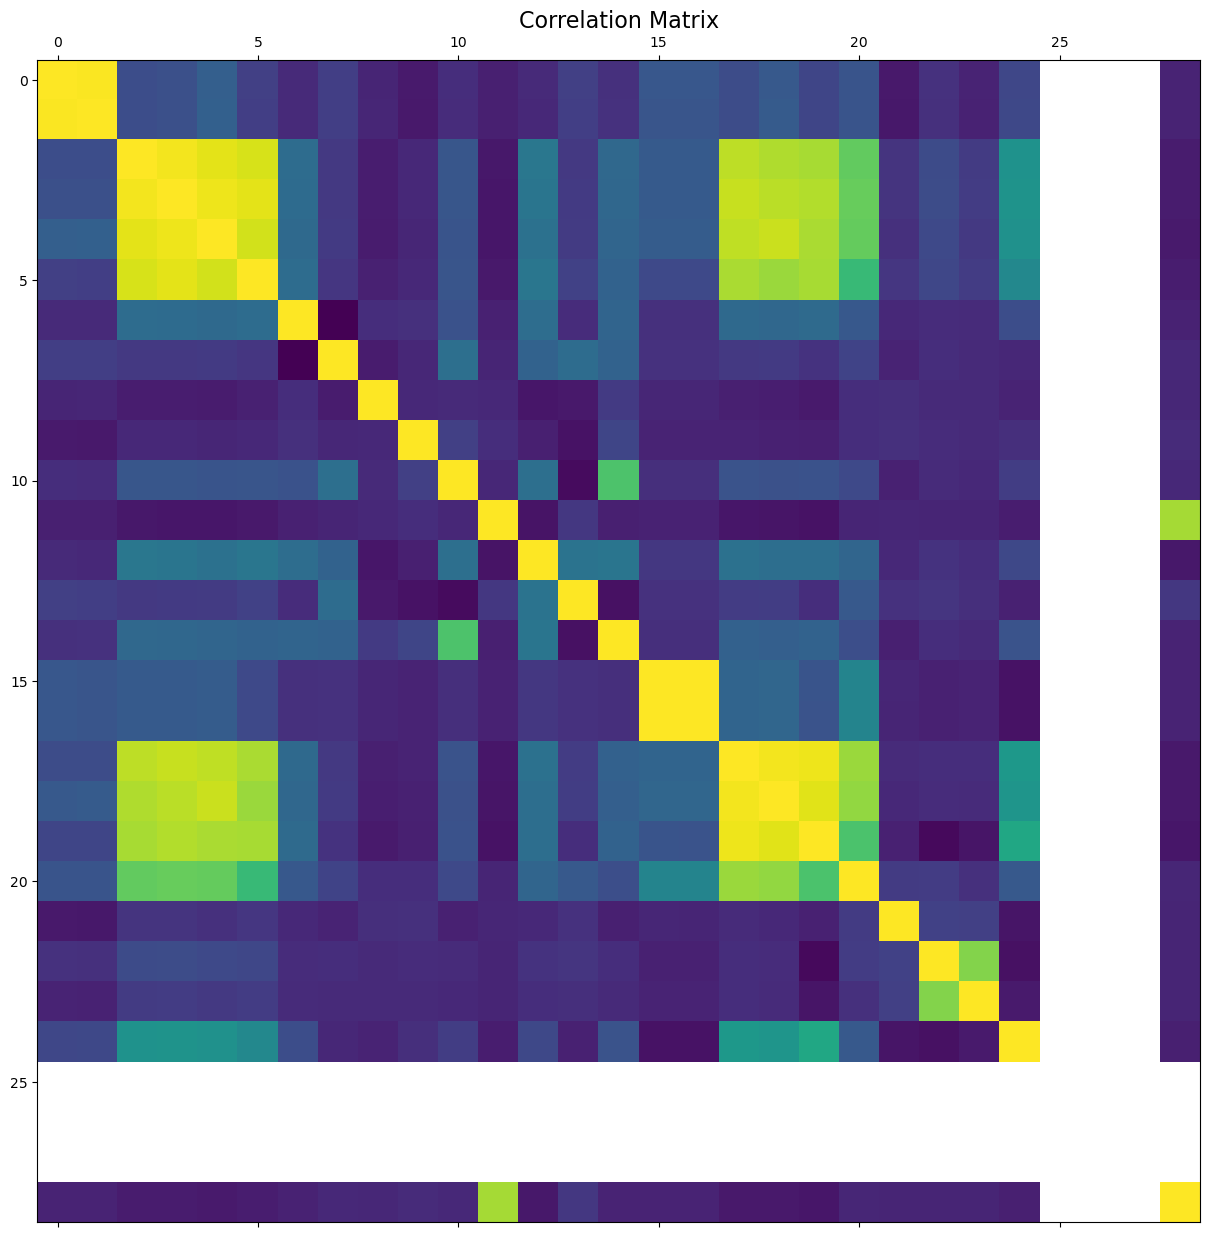

In [61]:
f = plt.figure(figsize=(15,15))
plt.matshow(loan_data3.corr(), fignum=f.number)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

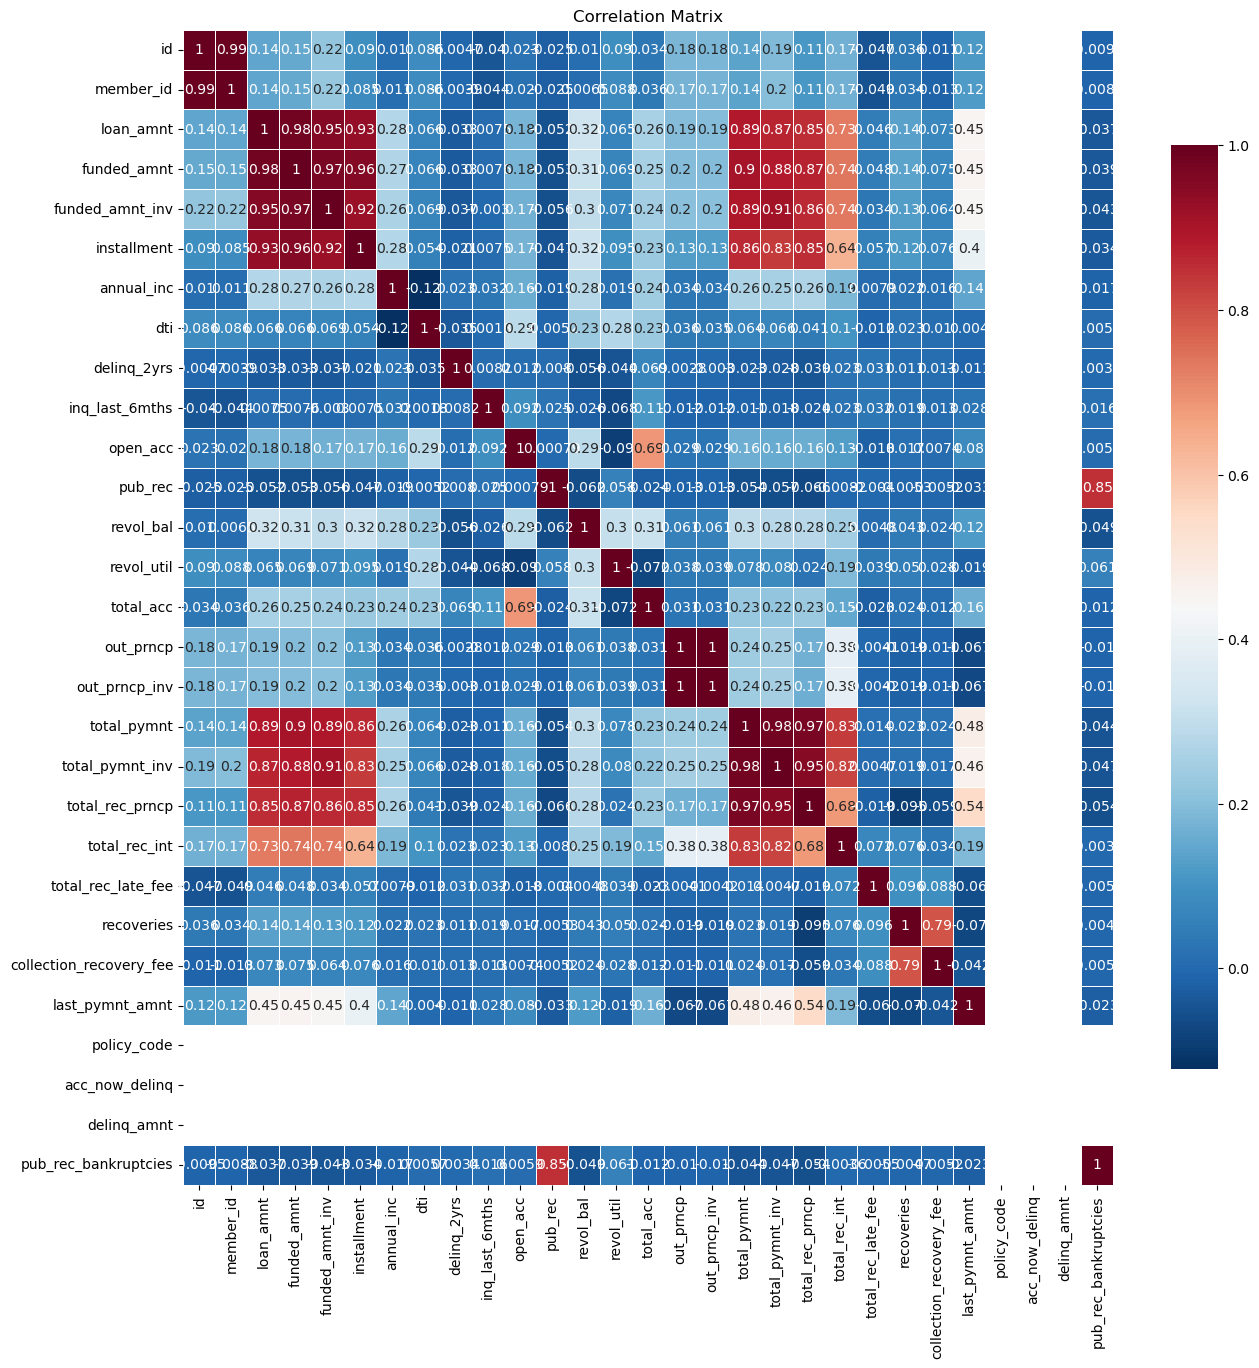

In [62]:
plt.figure(figsize=(15, 15))
graph = sns.heatmap(loan_data3.corr(), cmap='RdBu_r', linewidths=.5, cbar_kws={"shrink": 0.8}, annot=True)
plt.title('Correlation Matrix')
plt.show()